### Importações

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS
from src.graphics import inspect_outliers, pairplot

sns.set_theme(palette="tab10")

RANDOM_STATE = 1

df = pd.read_excel(DADOS_ORIGINAIS)

df.head()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,24.1,0,yes,south,1483.208344,1744.950993
1,18,male,23.5,1,no,southeast,2237.607934,2632.479922
2,28,male,33.0,3,no,southeast,2046.087156,2728.116207
3,33,male,23.3,0,no,midwest,2331.692044,2743.167111
4,32,male,23.4,0,no,midwest,1942.501251,2285.295590


### Analisando estado dos dados

In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   str    
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   str    
 5   region                1338 non-null   str    
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), str(3)
memory usage: 103.0 KB


In [3]:
df.describe()

,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,28.247534,1.094918,2842.106654,3095.140103
std,14.049960,6.365738,1.205493,1423.430629,1193.648279
min,18.000000,16.800000,0.000000,841.874539,1122.499385
25%,27.000000,23.100000,0.000000,1711.701483,2080.643446
50%,39.000000,26.100000,1.000000,2194.088277,2674.830804
75%,51.000000,32.800000,2.000000,4124.122644,4117.827436
max,64.000000,49.100000,5.000000,6495.087853,6185.797955


In [4]:
df.isnull().sum()

age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64

In [5]:
with pd.option_context("display.float_format", "{:.2f}".format):
    display(df.describe())

,age,bmi,children,expenses,premium
count,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,28.25,1.09,2842.11,3095.14
std,14.05,6.37,1.21,1423.43,1193.65
min,18.00,16.80,0.00,841.87,1122.50
25%,27.00,23.10,0.00,1711.70,2080.64
50%,39.00,26.10,1.00,2194.09,2674.83
75%,51.00,32.80,2.00,4124.12,4117.83
max,64.00,49.10,5.00,6495.09,6185.80


In [6]:
df.describe(exclude="number")

,gender,discount_eligibility,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Analisando distribuição dos dados

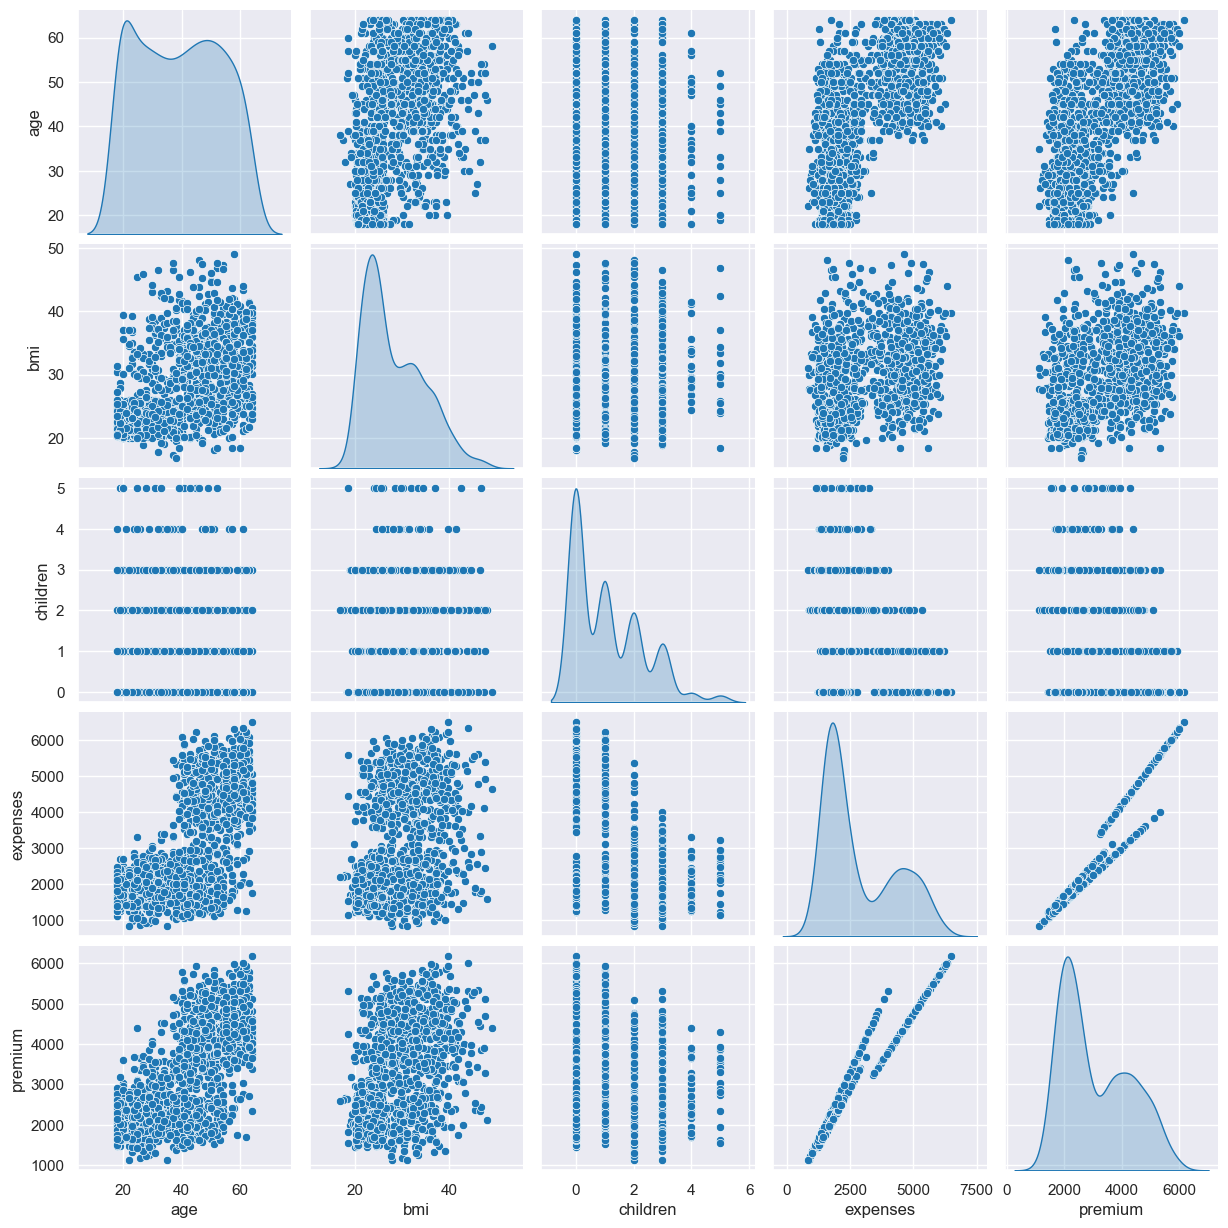

In [7]:
sns.pairplot(df, diag_kind="kde")

### Verificando Outliers

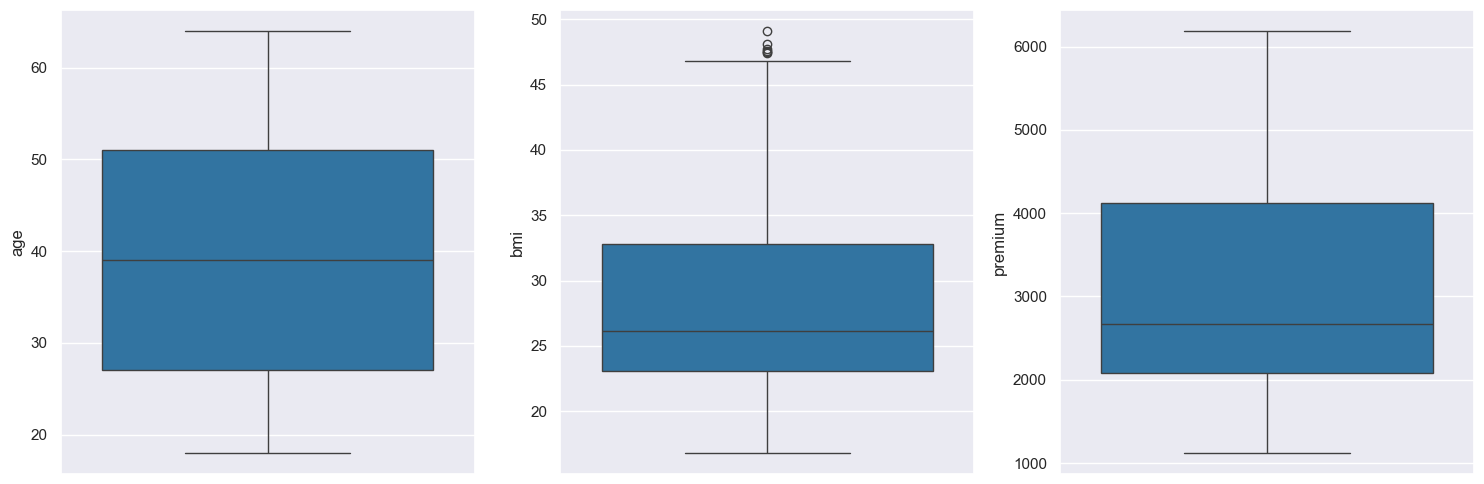

In [8]:
search_outliers = ["age","bmi","premium"]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5), tight_layout=True)

for ax, column in zip(axs.flatten(), df[search_outliers].columns):
    sns.boxplot(y=column, data=df, ax=ax)

plt.show()

In [9]:
inspect_outliers(df, "bmi")

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
116,58,male,49.1,0,no,southeast,4631.284251,4410.746906
286,46,female,48.1,2,no,northeast,1593.484553,2124.646071
401,47,male,47.5,1,no,southeast,5385.247735,5128.807366
543,54,female,47.4,0,yes,southeast,4105.023381,3909.546077
860,37,female,47.6,2,yes,south,2462.344898,3283.126531
1088,52,male,47.7,1,no,southeast,4920.311320,4686.010781


### Eliminando outliers

In [10]:
df = df.drop(inspect_outliers(df, "bmi").index)

df.info()

<class 'pandas.DataFrame'>
Index: 1332 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1332 non-null   int64  
 1   gender                1332 non-null   str    
 2   bmi                   1332 non-null   float64
 3   children              1332 non-null   int64  
 4   discount_eligibility  1332 non-null   str    
 5   region                1332 non-null   str    
 6   expenses              1332 non-null   float64
 7   premium               1332 non-null   float64
dtypes: float64(3), int64(2), str(3)
memory usage: 113.3 KB


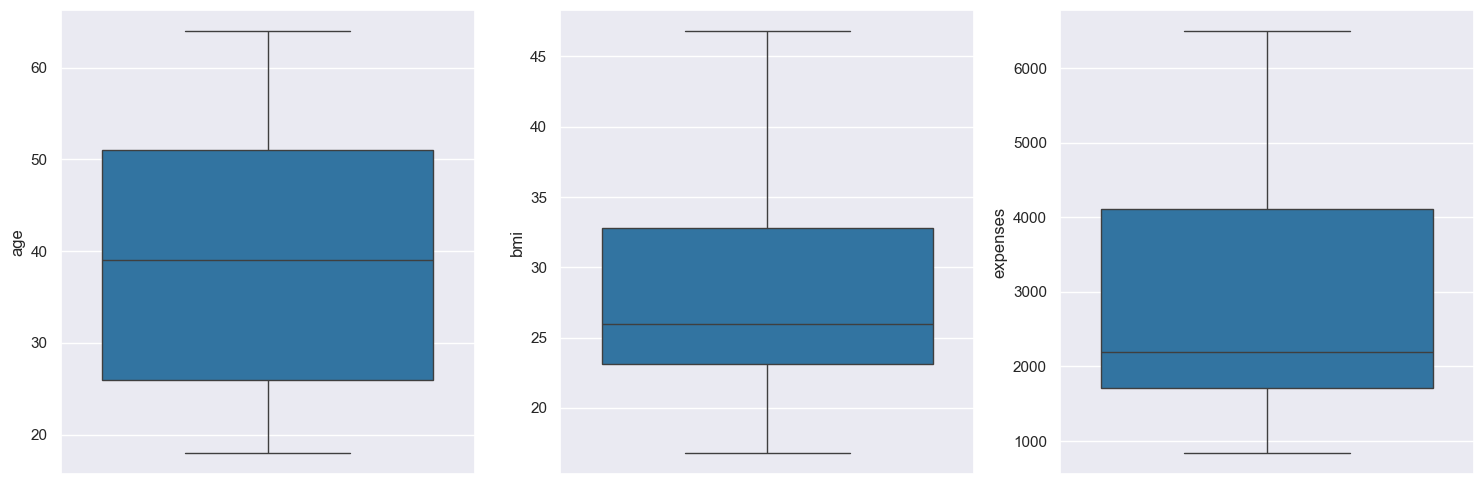

In [16]:
search_outliers = ["age","bmi","expenses"]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5), tight_layout=True)

for ax, column in zip(axs.flatten(), df[search_outliers].columns):
    sns.boxplot(y=column, data=df, ax=ax)

plt.show()

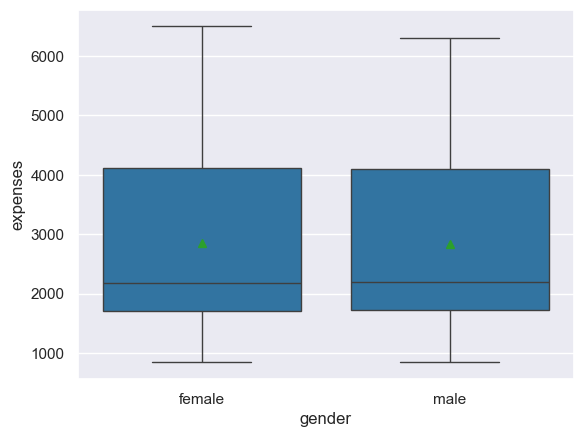

In [17]:
sns.boxplot(x="gender", y="expenses", data=df, showmeans=True);


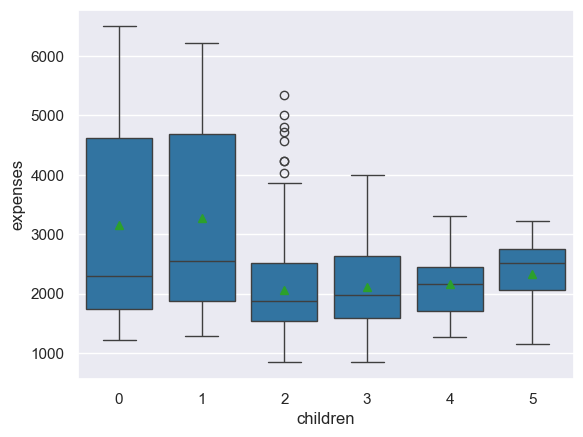

In [18]:
sns.boxplot(x="children", y="expenses", data=df, showmeans=True);


#### Exportando dados tratados

In [11]:
df.to_parquet(DADOS_TRATADOS, index=False)